<a href="https://colab.research.google.com/github/XescLlabres/tfgFLM/blob/main/HUSE_per_masstum/AnalisiMASSTUMORALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DF i fórmules

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('final_table.csv')
id_column = 'ID'
diagnosis_column = 'Viable'
prob_columns = df.columns[2:]
probabilities = df.iloc[:, 2:]
y_pred = (probabilities.mean(axis=1) >= 0.5).astype(int)
df_processed = pd.DataFrame({
    'ID': id_column,
    'Viable': diagnosis_column,
    'Predicció': y_pred
})

def calcular_intervalo(probabilidades, li, ls):
    lower_bound = np.percentile(probabilidades, li)
    upper_bound = np.percentile(probabilidades, ls)
    return lower_bound, upper_bound



In [ ]:
intervalos_confianza = []

for index, row in df.iterrows():
    probabilidades = row[prob_columns].values
    lower, upper = calcular_intervalo(probabilidades, 2.5, 97.5)
    intervalos_confianza.append([row[id_column], row[diagnosis_column], y_pred[index], lower, upper])

df_intervalos = pd.DataFrame(intervalos_confianza, columns=[id_column, diagnosis_column, 'Predicció', 'lower_bound', 'upper_bound'])
print(df_intervalos.head())

      ID  Viable  Predicció  lower_bound  upper_bound
0  222.0     0.0          0     0.201606     0.580319
1  346.0     0.0          1     0.602725     0.853156
2  613.0     1.0          1     0.513835     0.828996
3  613.2     1.0          1     0.555884     0.843928
4  697.0     1.0          1     0.484033     0.794063


In [ ]:

def calcular_TP(a, b):
    TP = min(1 - a, b)
    return TP
def calcular_AP(a,b):
    AP = min(a, 1-b)
    return AP
def calcular_EP(a,b):
    EP = (b-a)
    return EP


In [ ]:
df_intervalos['TP'] = df_intervalos.apply(lambda row: calcular_TP(row['lower_bound'], row['upper_bound']), axis=1)

df_intervalos['AP'] = df_intervalos.apply(lambda row: calcular_AP(row['lower_bound'], row['upper_bound']), axis=1)

df_intervalos['EP'] = df_intervalos.apply(lambda row: calcular_EP(row['lower_bound'], row['upper_bound']), axis=1)

print(df_intervalos.head())


      ID  Viable  Predicció  lower_bound  upper_bound        TP        AP  \
0  222.0     0.0          0     0.201606     0.580319  0.580319  0.201606   
1  346.0     0.0          1     0.602725     0.853156  0.397275  0.146844   
2  613.0     1.0          1     0.513835     0.828996  0.486165  0.171004   
3  613.2     1.0          1     0.555884     0.843928  0.444116  0.156072   
4  697.0     1.0          1     0.484033     0.794063  0.515967  0.205937   

         EP  
0  0.378713  
1  0.250430  
2  0.315161  
3  0.288044  
4  0.310030  


#Analisi

In [ ]:
medias = df_intervalos[['TP', 'AP', 'EP']].mean()
print("Mitjanes:")
print(medias)

#Trobar el valor maxim
fila_max_TP = df_intervalos.loc[df_intervalos['TP'].idxmax()]
print("\nMassa tumoral amb el valor màxim de TP:")
print(fila_max_TP)

# Trobar valor mínim
fila_min_TP = df_intervalos.loc[df_intervalos['TP'].idxmin()]
print("\nMassa tumoral amb el valor mínim de TP:")
print(fila_min_TP)

desviacion = df_intervalos[['TP', 'AP', 'EP']].std()
print("\nDesviacions estàndar:")
print(desviacion)


Mitjanes:
TP    0.564431
AP    0.235492
EP    0.328939
dtype: float64

Massa tumoral amb el valor màxim de TP:
ID             8671.300000
Viable            0.000000
Predicció         1.000000
lower_bound       0.202071
upper_bound       0.824821
TP                0.797929
AP                0.175179
EP                0.622750
Name: 128, dtype: float64

Massa tumoral amb el valor mínim de TP:
ID             8698.000000
Viable            0.000000
Predicció         0.000000
lower_bound       0.038960
upper_bound       0.272156
TP                0.272156
AP                0.038960
EP                0.233195
Name: 136, dtype: float64

Desviacions estàndar:
TP    0.076346
AP    0.066736
EP    0.066345
dtype: float64


In [ ]:
correlaciones = df_intervalos[['TP', 'AP', 'EP']].corr()
print("\nCorrelacions entre TP, AP i EP:")
print(correlaciones)



Correlacions entre TP, AP i EP:
          TP        AP        EP
TP  1.000000  0.577109  0.570235
AP  0.577109  1.000000 -0.341789
EP  0.570235 -0.341789  1.000000


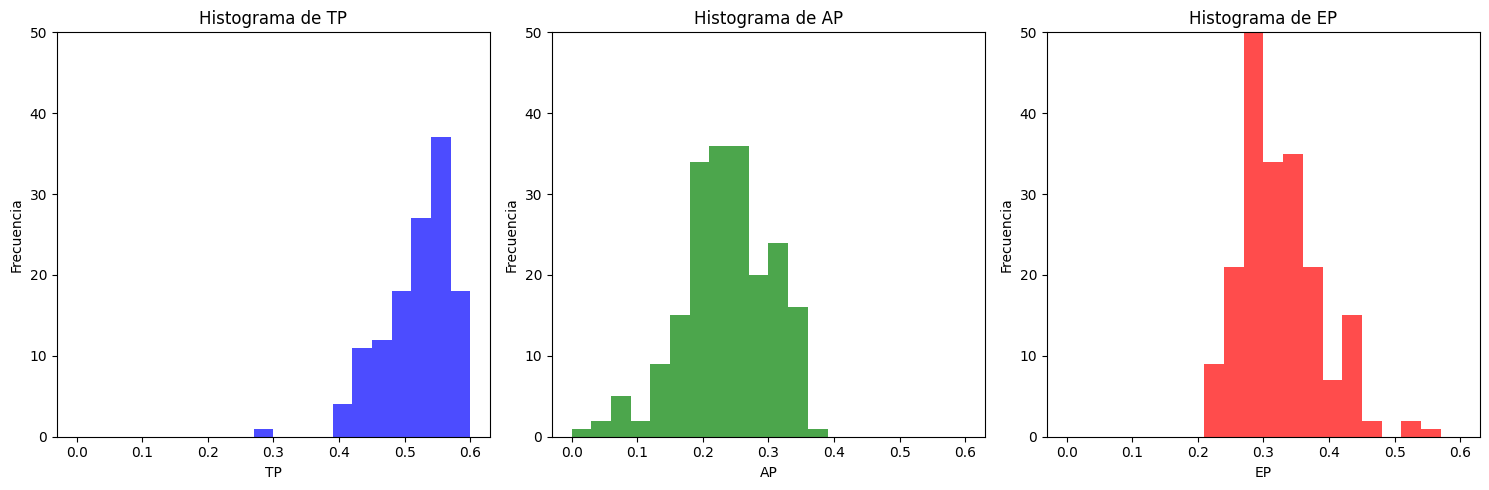

In [ ]:
import matplotlib.pyplot as plt

# Crear histogrames per TP, AP i EP
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_intervalos['TP'], bins=20, color='blue', alpha=0.7, range = [0, 0.60])
plt.title('Histograma de TP')
plt.xlabel('TP')
plt.ylabel('Frecuencia')
plt.ylim(0,50)

plt.subplot(1, 3, 2)
plt.hist(df_intervalos['AP'], bins=20, color='green', alpha=0.7, range= [0,0.60])
plt.title('Histograma de AP')
plt.xlabel('AP')
plt.ylabel('Frecuencia')
plt.ylim(0,50)

plt.subplot(1, 3, 3)
plt.hist(df_intervalos['EP'], bins=20, color='red', alpha=0.7, range = [0,0.60])
plt.title('Histograma de EP')
plt.xlabel('EP')
plt.ylabel('Frecuencia')
plt.ylim(0,50)

plt.tight_layout()
plt.show()


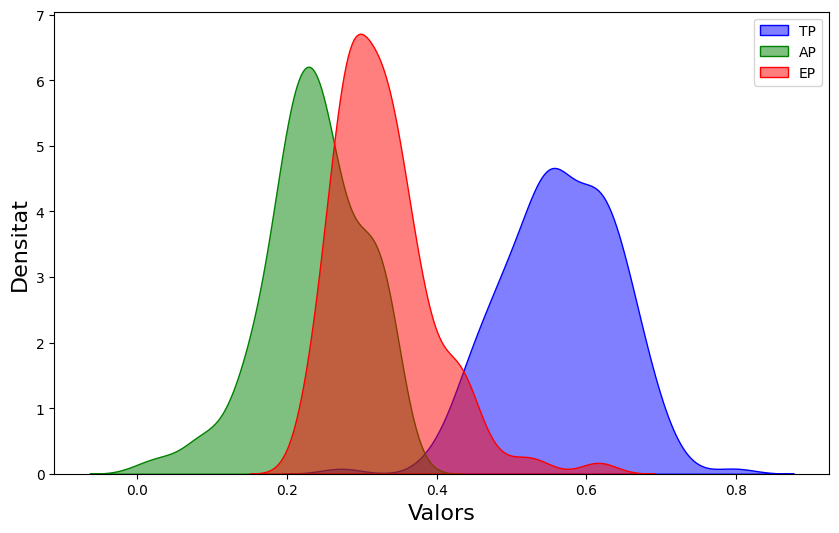

In [ ]:
import seaborn as sns

#Gràfic de densitat
plt.figure(figsize=(10, 6))
sns.kdeplot(df_intervalos['TP'], label='TP', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df_intervalos['AP'], label='AP', fill=True, color='green', alpha=0.5)
sns.kdeplot(df_intervalos['EP'], label='EP', fill=True, color='red', alpha=0.5)


plt.xlabel('Valors', fontsize=16)
plt.ylabel('Densitat', fontsize=16)
plt.legend()
plt.show()


In [ ]:
medias_por_diagnostico = df_intervalos.groupby('Viable')[['TP', 'AP', 'EP']].mean()
print("\nMitjanes de TP, AP i EP per diagnosis:")
print(medias_por_diagnostico)



Mitjanes de TP, AP i EP per diagnosis:
              TP        AP        EP
Viable                              
0.0     0.571741  0.231472  0.340269
1.0     0.557880  0.239095  0.318785


In [ ]:
Q1 = df_intervalos[['TP', 'AP', 'EP']].quantile(0.25)
Q3 = df_intervalos[['TP', 'AP', 'EP']].quantile(0.75)
IQR = Q3 - Q1

# Cambiam el factor a 2.0 en lloc de 1.5 per ser més permisius
outliers = df_intervalos[ ((df_intervalos[['TP', 'AP', 'EP']] < (Q1 - 7.0 * IQR)) |
                             (df_intervalos[['TP', 'AP', 'EP']] > (Q3 + 7.0 * IQR))).any(axis=1) ]

print("\nOutliers detectats (ajustat):")
print(outliers)



Outliers detectats (ajustat):
Empty DataFrame
Columns: [ID, Viable, Predicció, lower_bound, upper_bound, TP, AP, EP]
Index: []


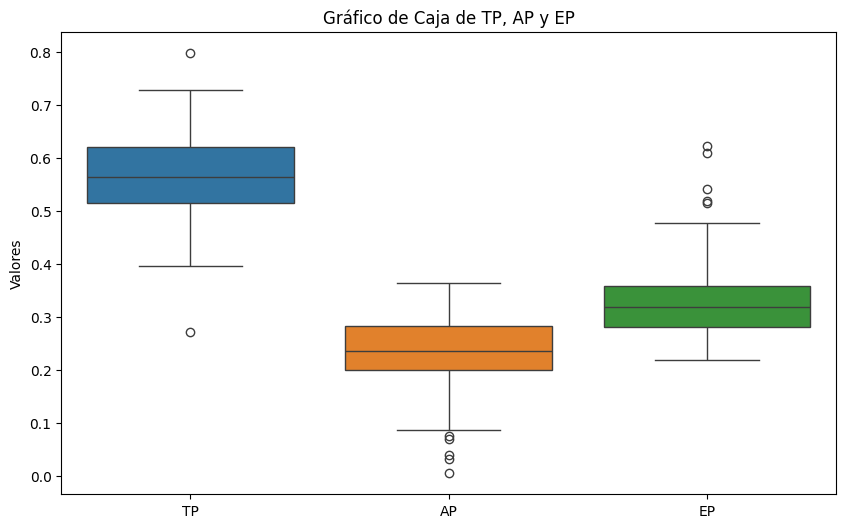

In [ ]:
import seaborn as sns

# Crear un gràfic de caixa per TP, AP i EP
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_intervalos[['TP', 'AP', 'EP']])
plt.title('Gráfico de Caja de TP, AP y EP')
plt.ylabel('Valores')
plt.xticks(ticks=[0, 1, 2], labels=['TP', 'AP', 'EP'])
plt.show()


In [ ]:
if not outliers.empty:
    print("\nEstadísticas descriptivas de los outliers:")
    print(outliers[['TP', 'AP', 'EP']].describe())
else:
    print("No se encontraron outliers después de ajustar el rango.")


No se encontraron outliers después de ajustar el rango.


In [ ]:
matching_rows = df_intervalos[df_intervalos['Viable'] == df_intervalos['Predicció']]
non_matching_rows = df_intervalos[df_intervalos['Viable'] != df_intervalos['Predicció']]


In [ ]:
medias = matching_rows[['TP', 'AP', 'EP']].mean()
print("Mitjanes:")
print(medias)

Mitjanes:
TP    0.560781
AP    0.231943
EP    0.328839
dtype: float64


In [ ]:
medias = non_matching_rows[['TP', 'AP', 'EP']].mean()
print("Mitjanes:")
print(medias)

Mitjanes:
TP    0.572245
AP    0.243091
EP    0.329153
dtype: float64


Una mica menys de incertesa quan encertam que quan fallam.

---



#Filtratge

In [ ]:
df_filtrado = df_intervalos[df_intervalos['TP'] <0.75]
print(np.shape(df_filtrado))

print("Masses tumorals filtrades:")
print(df_filtrado)

# Mostrar estadísticas descriptivas del DataFrame filtrado
print("\nEstadístiques per valors filtrats:")
print(df_filtrado[['TP', 'AP', 'EP']].describe())


(200, 8)
Masses tumorals filtrades:
         ID  Viable  Predicció  lower_bound  upper_bound        TP        AP  \
0     222.0     0.0          0     0.201606     0.580319  0.580319  0.201606   
1     346.0     0.0          1     0.602725     0.853156  0.397275  0.146844   
2     613.0     1.0          1     0.513835     0.828996  0.486165  0.171004   
3     613.2     1.0          1     0.555884     0.843928  0.444116  0.156072   
4     697.0     1.0          1     0.484033     0.794063  0.515967  0.205937   
..      ...     ...        ...          ...          ...       ...       ...   
196  8996.0     1.0          1     0.330045     0.700435  0.669955  0.299565   
197  8996.2     0.0          1     0.450791     0.775950  0.549209  0.224050   
198  8999.0     0.0          0     0.075168     0.547434  0.547434  0.075168   
199  9001.0     0.0          0     0.282021     0.697604  0.697604  0.282021   
200  9005.0     0.0          1     0.386097     0.722589  0.613903  0.277411   

   

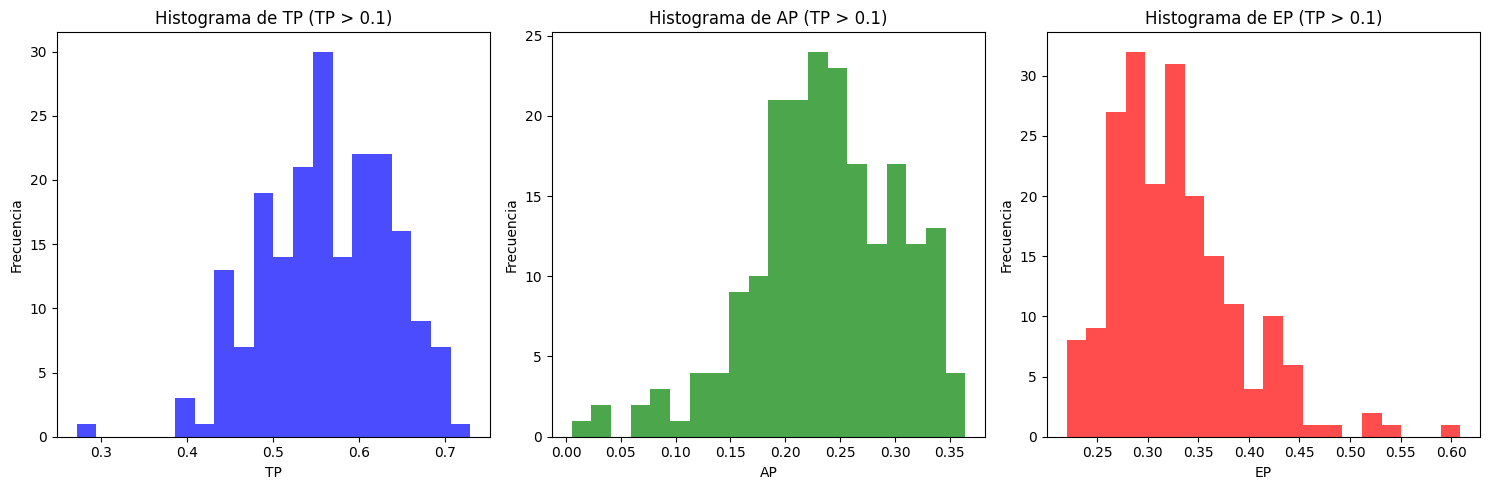

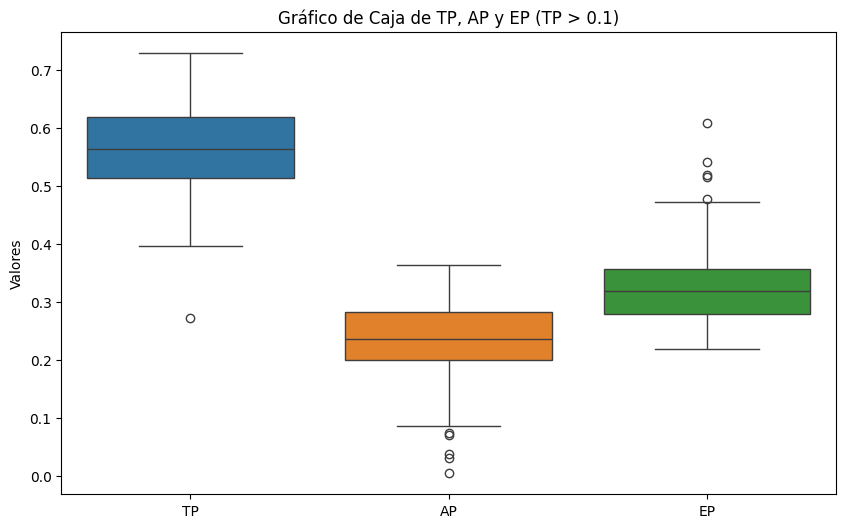

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para TP, AP y EP en el DataFrame filtrado
plt.figure(figsize=(15, 5))

# Histograma para TP
plt.subplot(1, 3, 1)
plt.hist(df_filtrado['TP'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de TP (TP > 0.1)')
plt.xlabel('TP')
plt.ylabel('Frecuencia')

# Histograma para AP
plt.subplot(1, 3, 2)
plt.hist(df_filtrado['AP'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de AP (TP > 0.1)')
plt.xlabel('AP')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(df_filtrado['EP'], bins=20, color='red', alpha=0.7)
plt.title('Histograma de EP (TP > 0.1)')
plt.xlabel('EP')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado[['TP', 'AP', 'EP']])
plt.title('Gráfico de Caja de TP, AP y EP (TP > 0.1)')
plt.ylabel('Valores')
plt.xticks(ticks=[0, 1, 2], labels=['TP', 'AP', 'EP'])
plt.show()


In [ ]:
medias_por_diagnostico = df_filtrado.groupby('Viable')[['TP', 'AP', 'EP']].mean()
print("\nMedias de TP, AP y EP por diagnosis (TP > 0.1):")
print(medias_por_diagnostico)



Medias de TP, AP y EP por diagnosis (TP > 0.1):
              TP        AP        EP
Viable                              
0.0     0.569335  0.232071  0.337264
1.0     0.557880  0.239095  0.318785


In [ ]:
fila_max_TP = df_filtrado.loc[df_filtrado['TP'].idxmax()]
print("\nFila con el valor máximo de TP (TP > 0.1):")
print(fila_max_TP)

fila_min_TP = df_filtrado.loc[df_filtrado['TP'].idxmin()]
print("\nFila con el valor mínimo de TP (TP > 0.1):")
print(fila_min_TP)



Fila con el valor máximo de TP (TP > 0.1):
ID             8907.000000
Viable            1.000000
Predicció         1.000000
lower_bound       0.213210
upper_bound       0.729067
TP                0.729067
AP                0.213210
EP                0.515857
Name: 174, dtype: float64

Fila con el valor mínimo de TP (TP > 0.1):
ID             8698.000000
Viable            0.000000
Predicció         0.000000
lower_bound       0.038960
upper_bound       0.272156
TP                0.272156
AP                0.038960
EP                0.233195
Name: 136, dtype: float64


In [ ]:
correlacion = df_filtrado[['TP', 'EP']].corr().iloc[0, 1]

print(f"\nCorrelación entre TP y EP (TP > 0.1): {correlacion:.4f}")



Correlación entre TP y EP (TP > 0.1): 0.5418
